In [1]:
# importing libraries

import numpy as np
import mahotas
import sklearn
import joblib
import cv2
import os
import glob


fixed_size             = tuple((500, 500))
train_path             = r"C:\Users\shubh\Cotton_Project\Disease\train"
test_path             = r"C:\Users\shubh\Cotton_Project\Disease\test"
bins                   = 8

In [2]:
def bgr_rgb(image):
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return rgb_img

def rgb_hsv(rgb_img):
    hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
    return hsv_img

In [3]:
# image segmentation

def img_segmentation(rgb_img,hsv_img):
    lower_green = np.array([25,0,20])
    upper_green = np.array([100,255,255])
    healthy_mask = cv2.inRange(hsv_img, lower_green, upper_green)
    result = cv2.bitwise_and(rgb_img,rgb_img, mask=healthy_mask)
    lower_brown = np.array([10,0,10])
    upper_brown = np.array([30,255,255])
    disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
    disease_result = cv2.bitwise_and(rgb_img, rgb_img, mask=disease_mask)
    final_mask = healthy_mask + disease_mask
    final_result = cv2.bitwise_and(rgb_img, rgb_img, mask=final_mask)
    return final_result

In [4]:
# feature-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

# feature-2: Haralick Texture
def fd_haralick(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

# feature-3: Color Histogram
def fd_histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [5]:
#labels
labels = os.listdir(train_path)

# sorting labels
labels.sort()
print(labels)


train_features = []
train_labels   = []
test_features  = []
test_labels    = []

['Healthy', 'Infected']


In [6]:
# Getting training data
for name in labels:
    dir = os.path.join(train_path, name)

    # current label
    current_label = name
    
    # Getting List of all images
    for src in os.listdir(dir):
        # get the image file name
        file = dir + "\\" + src
        image = cv2.imread(file)
        image = cv2.resize(image, fixed_size)

        
        # call for image functions
        
        BGR_RGB       = bgr_rgb(image)
        RGB_HSV       = rgb_hsv(BGR_RGB)
        IMG_SEGMENT   = img_segmentation(BGR_RGB,RGB_HSV)

        # Call for Global Fetaures
        
        fv_hu_moments = fd_hu_moments(IMG_SEGMENT)
        fv_haralick   = fd_haralick(IMG_SEGMENT)
        fv_histogram  = fd_histogram(IMG_SEGMENT)
        
        # Concatenate 
        
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        
        

        # append to list
        train_labels.append(current_label)
        train_features.append(global_feature)

    print("Processed folder: {}".format(current_label))

print("Completed Global Feature Extraction...")

Processed folder: Healthy
Processed folder: Infected
Completed Global Feature Extraction...


In [7]:
# get the overall feature vector size
print("Global features {}".format(np.array(train_features).shape))

# get the overall training label size
print("Labels {}".format(np.array(train_labels).shape))

Global features (715, 532)
Labels (715,)


In [8]:
# encode the target labels
from sklearn.preprocessing import LabelEncoder
le          = LabelEncoder()
train_target      = le.fit_transform(train_labels)
print("Labels encoded...")

Labels encoded...


In [9]:
# scale features in the range (0-1)
from sklearn.preprocessing import MinMaxScaler
scaler            = MinMaxScaler(feature_range=(0, 1))
trainscaled_features = scaler.fit_transform(train_features)
print("Features normalized...")

Features normalized...


In [10]:
print("Labels: {}".format(train_target))
print("Labels shape: {}".format(train_target.shape))

Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 

In [11]:
# Getting testing data
for name in labels:
    dir = os.path.join(test_path, name)

    # current label
    current_label = name

    #Getting List of all images
    for src in os.listdir(dir):
        # get the image file name
        file = dir + "\\" + src
        image = cv2.imread(file)
        image = cv2.resize(image, fixed_size)

        
        # call for image functions
        
        BGR_RGB       = bgr_rgb(image)
        RGB_HSV       = rgb_hsv(BGR_RGB)
        IMG_SEGMENT   = img_segmentation(BGR_RGB,RGB_HSV)
        
        # Call for Global Fetaures
        
        fv_hu_moments = fd_hu_moments(IMG_SEGMENT)
        fv_haralick   = fd_haralick(IMG_SEGMENT)
        fv_histogram  = fd_histogram(IMG_SEGMENT)
        
        # Concatenate 
        
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        
        

        # append to list
        test_labels.append(current_label)
        test_features.append(global_feature)

    print("Processed folder: {}".format(current_label))

print("Completed Global Feature Extraction...")

Processed folder: Healthy
Processed folder: Infected
Completed Global Feature Extraction...


In [12]:
# get the overall feature vector size
print("Global features size {}".format(np.array(test_features).shape))

# get the overall training label size
print("Labels {}".format(np.array(test_labels).shape))

Global features size (51, 532)
Labels (51,)


In [13]:
# encode the target labels
from sklearn.preprocessing import LabelEncoder
le          = LabelEncoder()
test_target      = le.fit_transform(test_labels)
print("Labels encoded...")

Labels encoded...


In [14]:
# scale features in the range (0-1)
from sklearn.preprocessing import MinMaxScaler
scaler            = MinMaxScaler(feature_range=(0, 1))
testscaled_features = scaler.fit_transform(test_features)
print("Global features normalized...")

Global features normalized...


In [15]:
print("Labels: {}".format(test_target))
print("Labels shape: {}".format(test_target.shape))

Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels shape: (51,)


In [16]:
# Model Training
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

warnings.filterwarnings('ignore')


num_trees = 100
seed = 7
scoring    = "accuracy"

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))

# variables to hold the results and names
results = []
names   = []

LR: 0.901961 
LDA: 0.588235 
KNN: 0.901961 
CART: 0.725490 
RF: 0.921569 
NB: 0.588235 
SVM: 0.823529 


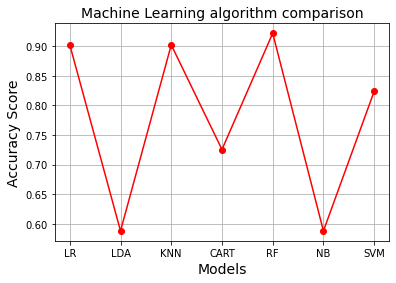

In [17]:
# Checking Accuracy for multiple models
for name, model in models:
    model.fit(trainscaled_features, train_target)
    y_predict=model.predict(testscaled_features)
    res = accuracy_score(test_target, y_predict)
    results.append(res)
    names.append(name)
    msg = "%s: %f " % (name, res.mean())
    print(msg)
       
plt.plot(names, results, color='red', marker='o')
plt.title('Machine Learning algorithm comparison', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.grid(True)
plt.show()

In [18]:
clf  = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
clf.fit(trainscaled_features, train_target)
y_predict=clf.predict(testscaled_features)

In [19]:
# save the model to disk
filename = 'Disease_detection.sav'
joblib.dump(clf, filename)

['Disease_detection.sav']

In [20]:
cm = confusion_matrix(test_target,y_predict)

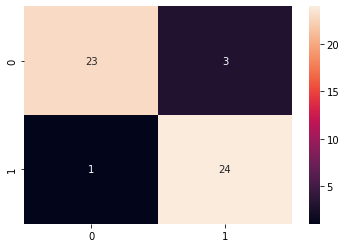

In [21]:
sns.heatmap(cm ,annot=True)

In [22]:
accuracy_score(test_target, y_predict)

0.9215686274509803

In [23]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(testscaled_features, test_target)
print(result)

0.9215686274509803


In [25]:
for img in glob.glob(r'C:\Users\shubh\Cotton_Project\data\*.jpg'):
    image = cv2.imread(img)

    image = cv2.resize(image, fixed_size)

    # Call Image functios

    BGR_RGB       = bgr_rgb(image)
    RGB_HSV       = rgb_hsv(BGR_RGB)
    IMG_SEGMENT   = img_segmentation(BGR_RGB,RGB_HSV)

    # Call for Global Fetaure Descriptors

    fv_hu_moments = fd_hu_moments(IMG_SEGMENT)
    fv_haralick   = fd_haralick(IMG_SEGMENT)
    fv_histogram  = fd_histogram(IMG_SEGMENT)

    # Concatenate 

    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

    features = []
    features.append(global_feature)

    pred = loaded_model.predict(features)
    
    for i in pred:
        if i == 0:
            print('healthy')
        else:
            print('infected')

healthy
healthy
healthy
healthy
healthy
healthy
healthy
infected
infected
infected
healthy
healthy
healthy
healthy
